In [1]:
# 環境の問題：　 libiomp5.dylib というファイルがダブってる。その対応
import os
os.environ['KMP_DUPLICATE_LIB_OK']='TRUE'

## データのダウンロード

In [2]:
from tensorflow.keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

## 前処理

In [3]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_train = x_train.astype("float32")
x_train /= 255

x_test = x_test.reshape(-1, 28, 28, 1)
x_test = x_test.astype("float32")
x_test /= 255

## モデルの構築

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from tensorflow.keras.optimizers import SGD

model = Sequential()
# 層1
model.add(
        Conv2D(filters=32,
                       kernel_size=(3,3),
                      padding="same",
                      input_shape=(28, 28,1),
                      activation="relu"
                      ))
# 層2
model.add(
        Conv2D(filters=64,
                       kernel_size=(3,3),
                      padding="same",
                      input_shape=(28, 28,1),
                      activation="relu"
                      ))
# プーリング層
model.add(
        MaxPooling2D(pool_size=(2,2)))
# ドロップアウト
model.add(Dropout(0.5))
# 層3
model.add(
        Conv2D(filters=32,
                       kernel_size=(3,3),
                      padding="same",
                      input_shape=(28, 28,1),
                      activation="relu"
                      ))
# プーリング層
model.add(
        MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.5))
model.add(Flatten())
# 出力層
model.add(Dense(10,
                               activation="softmax"
                               ))
model.compile(
        loss="sparse_categorical_crossentropy",
        optimizer=SGD(lr=0.1),
        metrics=["accuracy"])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 32)        18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 32)          0

## 学習の実行

In [5]:
%%time

from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
        monitor="val_loss",
        patience=5,
        verbose=1
)

training_epochs = 30
batch_size = 64

history = model.fit(
        x_train,
        y_train,
        epochs=training_epochs,
        batch_size=batch_size,
        verbose=1,
        validation_split=0.2,
        shuffle=True,
        callbacks=[early_stopping]
        )

score = model.evaluate(x_test, y_test, verbose=0)

print("Test loss:", score[0])
print("Test accuracy:", score[1])

Train on 48000 samples, validate on 12000 samples
Epoch 1/30
48000/48000 [==============================] - 319s 7ms/sample - loss: 0.7298 - accuracy: 0.7383 - val_loss: 0.4435 - val_accuracy: 0.8479
Epoch 2/30
48000/48000 [==============================] - 335s 7ms/sample - loss: 0.4665 - accuracy: 0.8281 - val_loss: 0.3745 - val_accuracy: 0.8675
Epoch 3/30
48000/48000 [==============================] - 334s 7ms/sample - loss: 0.4126 - accuracy: 0.8522 - val_loss: 0.3321 - val_accuracy: 0.8817
Epoch 4/30
48000/48000 [==============================] - 334s 7ms/sample - loss: 0.3770 - accuracy: 0.8640 - val_loss: 0.3119 - val_accuracy: 0.8878
Epoch 5/30
48000/48000 [==============================] - 336s 7ms/sample - loss: 0.3528 - accuracy: 0.8726 - val_loss: 0.2967 - val_accuracy: 0.8924
Epoch 6/30
48000/48000 [==============================] - 337s 7ms/sample - loss: 0.3381 - accuracy: 0.8770 - val_loss: 0.2904 - val_accuracy: 0.8976
Epoch 7/30
48000/48000 [==========================

## 損失と精度の推移をグラフに

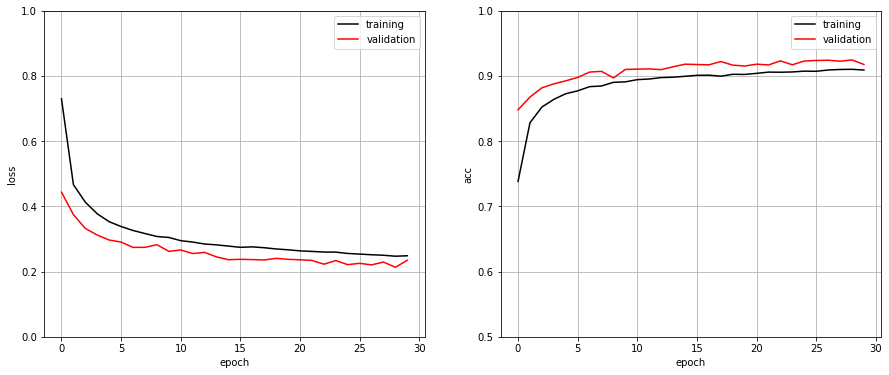

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))
plt.subplots_adjust(wspace=0.2)

plt.subplot(1,2,1)

plt.plot(history.history["loss"],
                label="training",
                color="black")

plt.plot(history.history["val_loss"],
                label="validation",
                color="red")
plt.ylim(0,1)
plt.legend()
plt.grid()
plt.xlabel("epoch")
plt.ylabel("loss")


plt.subplot(1,2,2)
plt.plot(history.history["accuracy"],
                label="training",
                color="black")

plt.plot(history.history["val_accuracy"],
                label="validation",
                color="red")
plt.ylim(0.5, 1)
plt.legend()
plt.grid()
plt.xlabel("epoch")
plt.ylabel("acc")
plt.show()


In [ ]:
from IPython.display import SVG
from keras.utils import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))